In [30]:
import numpy as np
import pandas as pd

In [196]:
import distribution_modules as dm
import density_estimation_modules as dem
import classification_modules as cm
import pca_modules as pm
import importlib

importlib.reload(dm)
importlib.reload(dem)
importlib.reload(cm)
importlib.reload(pm)

<module 'pca_modules' from '/home/jupyter/thesis/pca_modules.py'>

In [63]:
# set configurations
num_steps = 150
x = np.linspace(0,1,num_steps)

# cv config
test_size = 0.5
cv = 5
cv_config = [test_size, cv]

In [33]:
# reading data
train_data = pd.read_csv('graphwave_ac_train.csv')
test_data = pd.read_csv('graphwave_ac_test.csv')

In [64]:
kde_df = dem.get_kde(test_data, x)
kde_df.head(3)

,0,1,2,3,4,5,6,7,8,9,...,141,142,143,144,145,146,147,148,149,label
0,177.533922,2.280615,0.13861,0.068742,0.318389,0.043712,0.000001,5.602893e-15,2.483891e-27,9.337121e-37,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,B5_0
1,179.581589,2.266313,0.02056,0.003198,0.230797,0.081583,0.000064,4.700191e-12,3.190989e-23,1.999126e-38,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,B5_0
2,179.581589,2.266313,0.02056,0.003198,0.230797,0.081583,0.000064,4.700191e-12,3.190989e-23,1.999126e-38,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,B5_0


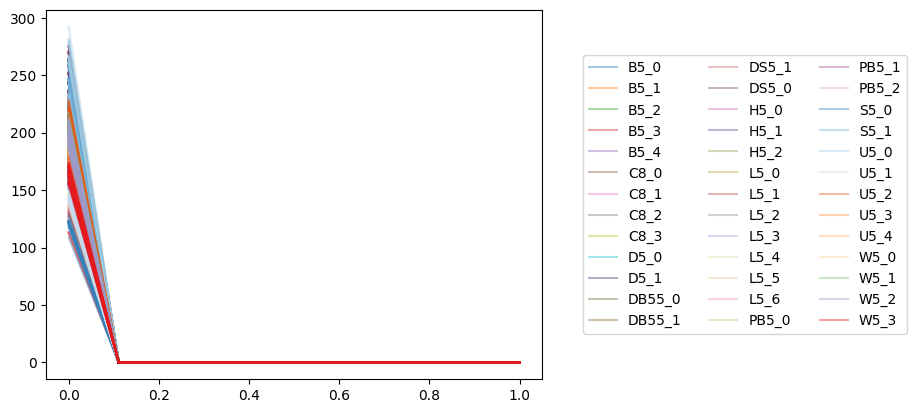

In [35]:
dem.get_kde_plot(kde_df,x)

In [36]:
num_steps_list = list(np.arange(10,300,10))

In [38]:
res_svm = cm.cv_numsteps(num_steps_list, test_data, train_data, cv_config, 1)

  0%|          | 0/29 [00:00<?, ?it/s]

In [37]:
res_lr = cm.cv_numsteps(num_steps_list, test_data, train_data, cv_config, 2)

  0%|          | 0/29 [00:00<?, ?it/s]

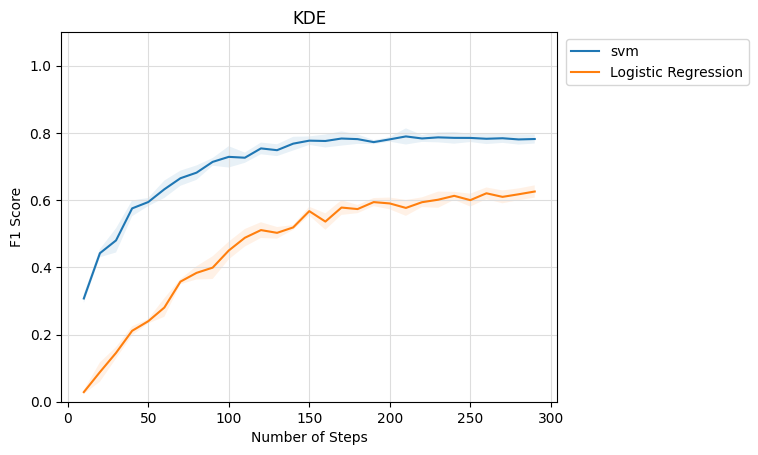

In [197]:
cm.plot_cv_kde(res_svm, res_lr)

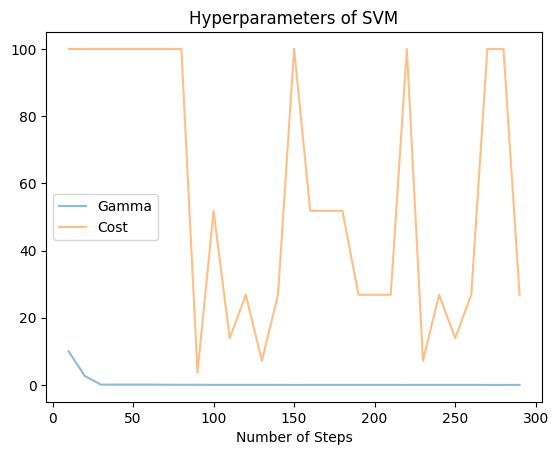

In [27]:
cm.plot_h_params_edf(res_svm)

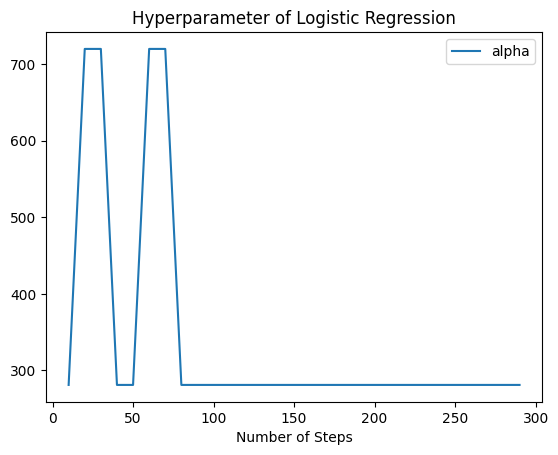

In [28]:
cm.plot_h_params_edf(res_lr)

In [67]:
pca_res = pm.perform_pca(kde_df, 5)

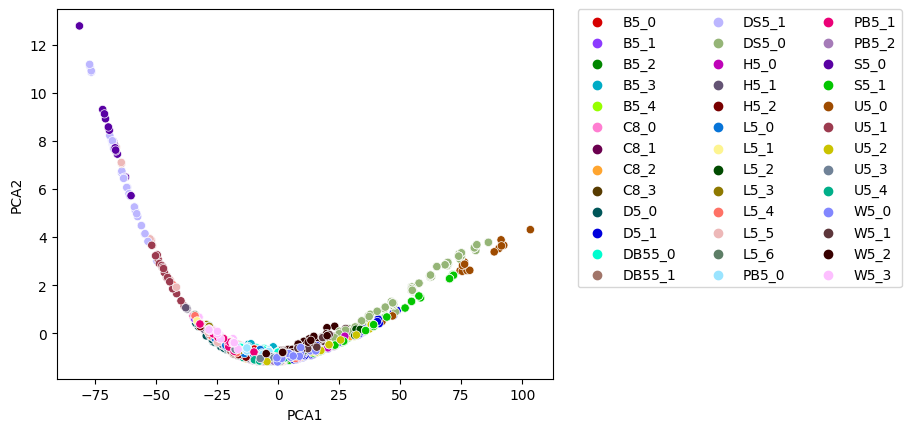

In [73]:
pm.plot_pca(pca_res, 'PCA1','PCA2', 39)

In [167]:
import scipy.stats as st
X1 = np.random.normal(0, 1, 5)
X2 = np.random.normal(10, 4, 10)
X = np.concatenate([X1, X2])

In [181]:
grid = np.linspace(-10, 25, 100)

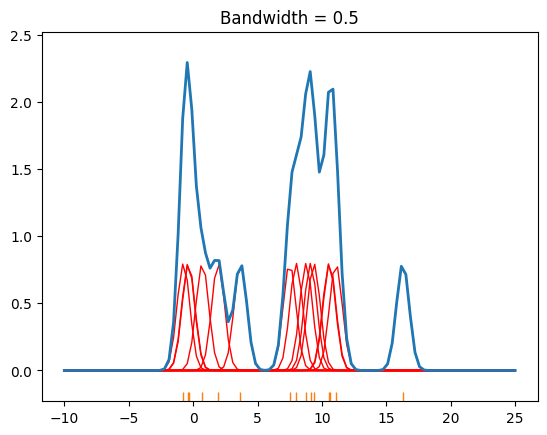

In [187]:
# now bandwidth is the std dev of Gaussian kernels
bandwidth = 0.5
kernels = []
for x_i in X:
    kernel = st.norm(x_i, bandwidth).pdf(grid)
    kernels.append(kernel)
    plt.plot(grid, kernel, lw=1, color="r")

# add up kernels
density = np.sum(kernels, axis=0)
plt.plot(grid, density, lw=2)
# raw data 
sns.rugplot(X)
plt.title('Bandwidth = 0.5')
plt.savefig('results/kde/b_0.5.png')

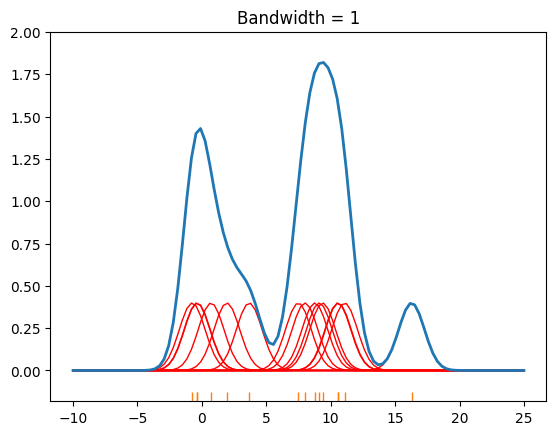

In [188]:
# now bandwidth is the std dev of Gaussian kernels
bandwidth = 1
kernels = []
for x_i in X:
    kernel = st.norm(x_i, bandwidth).pdf(grid)
    kernels.append(kernel)
    plt.plot(grid, kernel, lw=1, color="r")

# add up kernels
density = np.sum(kernels, axis=0)
plt.plot(grid, density, lw=2)
# raw data 
sns.rugplot(X)
plt.title('Bandwidth = 1')
plt.savefig('results/kde/b_1.png')

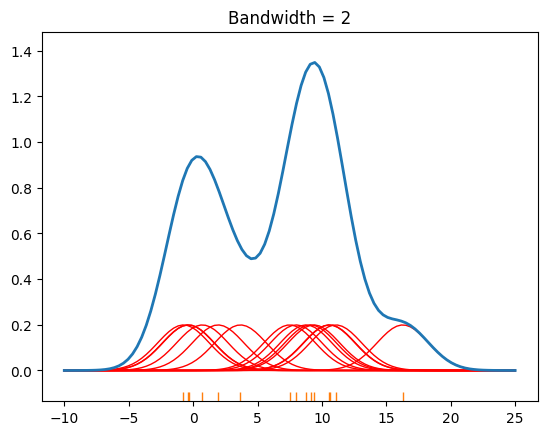

In [189]:
bandwidth = 2
kernels = []
for x_i in X:
    kernel = st.norm(x_i, bandwidth).pdf(grid)
    kernels.append(kernel)
    plt.plot(grid, kernel, lw=1, color="r")

# add up kernels
density = np.sum(kernels, axis=0)
plt.plot(grid, density, lw=2)
# raw data 
sns.rugplot(X)
plt.title('Bandwidth = 2')
plt.savefig('results/kde/b_2.png')

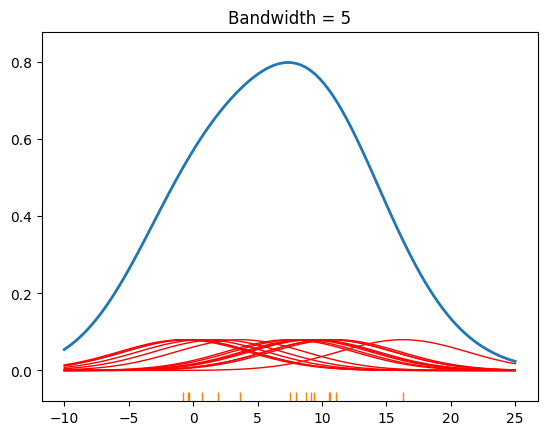

In [190]:
bandwidth = 5
kernels = []
for x_i in X:
    kernel = st.norm(x_i, bandwidth).pdf(grid)
    kernels.append(kernel)
    plt.plot(grid, kernel, lw=1, color="r")

# add up kernels
density = np.sum(kernels, axis=0)
plt.plot(grid, density, lw=2)
# raw data 
sns.rugplot(X)
plt.title('Bandwidth = 5')
plt.savefig('results/kde/b_5.png')